# 90 Minutes To Machine Learning
> A brief introduction to Codeup and building a Machine Learning model with Ryan Orsinger



## Why are we here?
1. Intro to the Codeup experience
2. Big Picture overview of Data Science
3. Intro to Machine Learning concepts and tools including:
    - Exposure to Python
    - Data acquisition and preparation
    - Data visualization
    - Building a predictive model w/ Scikit-Learn
    - Evaluating how well a predictive model performs

## Why Codeup?
- Focus on student outcomes
    - 25% of the January 2021 graduating class is placed in the last 3 weeks
    - The July 2020 graduating class is 94% placed.
- Placement services and quality of network
- Immersion works. Full-time, live instruction for 5 months works.
- Projects simulate the work environment from real world data to presenting findings to stakeholders

## What is Data Science?
- Interdisciplinary applied science intersecting programming, statistics, and domain expertise
- The application of the scientific method of hypothesis -> experiment -> analyze -> repeat to analyze and infer outcomes from data.
- A broad description of approaches ranging from business analysis and visualizations to machine learning and deep neural network analysis.
![](drawn_ds_venn_diagram.png)

## How Does Data Science Relate to Traditional Software and Data Analysis?
![](data_science_venn_diagram_with_overlapping_disciplines.png)

## What is Machine Learning?
- Machine Learning is the process of using previous data as the fuel for determining rules for making predictions of outcomes from future data.
- Classical programming takes business rules and data to produce answers. Ex. TurboTax software.
- Machine learning takes in data (and sometimes answers/labels for some data) and produces rules or predictions for future data. The example here is text message autocomplete.

<img src="classical_programming_vs_machine_learning.jpeg" width=500>

## Where does Machine Learning Fit Into Data Science?

![example data science pipepine and product](example_data_science_project.png)

## Challenges of Machine Learning
- Poor quality data
- Insufficient quantity of data
- Nonrepresentative data
- Bias in, Bias out:
    - [Cognitive Biases](https://en.wikipedia.org/wiki/List_of_cognitive_biases) arise from being human.
    - [Statistical Biases](https://en.wikipedia.org/wiki/Bias_(statistics)) arise from our methodologies. These have to do with how data is collected, how people respond, etc...
- Whatever Machine Learning "learns", it will keep doing. There is no cognition or intelligence, only pattern recognition and optimization.

## What Machine Learning and other skills are in the Codeup Data Science program?

![machine learning methods taught at Codeup](machine_learning_methods.png)


## What kind of ML will we doing today?
- We'll be using a decision tree classifier to predict whether or not we should expect employees to quit a company.
- Classification machine learning is used all the time for such things as:
    - Facial recognition
    - Handwriting recognition and conversion to typed text
    - Recommendation engines for new music or movies 
- Classification is a "supervised learning" type of machine learning. That means we train the algorithm on existing data to learn a rule, a recognized pattern, to apply to future data.

# Planning Stage

Let's play imagination!

In this scenario, you are a Data Scientist at a consulting company and your supervisor says:

_The Human Resources department needs your help. We know that employee attrition is expensive. It's bad for culture, and it costs a lot of time and money to recruit, hire, and onboard new employees. Here is a spreadsheet export of some of our HR information we have on employees. We need you to determine the predictors of an employee staying or leaving. What are the best predictors of attrition? Are the employee survey responses good indicators if people leave?_

### Critical Planning Questions?
- What's the business goal here?
- Who are the stakeholders?
- Why is this important to the business?
- What does our input data look like? 
- What is the thing we're trying to predict?
- What is our target variable, exactly?
- What are our predictor variables?

### Our Plan for this Dataset:
- Overall goal: Predict if a particular employee is going to leave the organization.
- Once we acquire the data, we'll need to clean/prepare it as much as necessary.
- Define the target variable
- Split the data to have in-sample and out-of-sample data for our modeling.

### Data Dictionary 
- A data dictionary explains the columns in a dataset and what the values in those columns mean. 
- In this dataset, here's what things mean:
    - `Attrition` specifies if an employee is left the company last year or is still employed.
    - `MonthlyIncome` is that employee's monthly salary figure.
    - `Education` is a number value meaning the academic background of the employee: 
        1. No college
        2. Some college
        3. Bachelor degree
        4. Master's degree
        5. PhD level
    - `WorkLifeBalance` is a number value the employee reported on a company survey meaning:
        1. "Bad"
        2. "Good"
        3. "Better"
        4. "Best"
    - `JobSatisfaction` is a number value the employee reported on a company survey meaning:
        1. "Low"
        2. "Medium"
        3. "High"
        4. "Very High"
    - `PercentSalaryHike` is the percentage increase in salary since last year.
    - `BusinessTravel` specifies if the employee travels frequently, rarely, or never

# Show Me The Code!

In [1]:
# Data Processing and Data Cleaning Libraries
import pandas as pd
import numpy as np

# Vizualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing
from sklearn.model_selection import train_test_split

# modeling imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.metrics import classification_report

In [2]:
# We'll use this split function later to create in-sample and out-of-sample datasets for modeling
def split(df, stratify_by=None):
    """
    3 way split for train, validate, and test datasets
    To stratify, send in a column name
    """
    
    if stratify_by == None:
        train, test = train_test_split(df, test_size=.2, random_state=123)
        train, validate = train_test_split(df, test_size=.3, random_state=123)
    else:
        train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[stratify_by])
        train, validate = train_test_split(df, test_size=.3, random_state=123, stratify=train[stratify_by])
    
    return train, validate, test

# Data Acquisition Stage

Python and its powerful code libraries like pandas allow us to easily acquire and clean data.

When you're acquiring data, make sure you know WHAT you're after and HOW to get it. Consult with your team if possible to confirm you have the right data before moving forward.

In [3]:
# Acquire our data from a Comma Separated Values text file exported from a spreadsheet in Human Resources.
url = "https://raw.githubusercontent.com/ryanorsinger/90-minutes-to-machine-learning/main/data.csv"
df = pd.read_csv(url, index_col="index")

# Get a sense of what each row/observation means
# See what columns we have to work with for this
# Our columns will be our features
df.head()

,Attrition,MonthlyIncome,Education,WorkLifeBalance,JobSatisfaction,PercentSalaryHike,BusinessTravel
index,,,,,,,
0,Yes,5993,2,1,4,11,Travel_Rarely
1,No,5130,1,3,2,23,Travel_Frequently
2,Yes,2090,2,3,3,15,Travel_Rarely
3,No,2909,4,3,3,11,Travel_Frequently
4,No,3468,1,3,2,12,Travel_Rarely


# Data Preparation Stage
- Machine Learning algorithms can only work on numbers, so we need to convert some of our columns into numbers.
- For example, the `Attrition` column only has 2 different values, so we will convert those "Yes" or "No" strings into 0 and 1s to represent True and False and so our Machine Algorithms can operate on them.
- The `BusinessTravel` column has 3 values, but "rarely" is close enough to "never", so we'll make this a binary too.
- In practice, real world data is _much_ messier than this example dataset.
- In industry, the data preparation stage is _critical_ because machine learning algorithms only work on numbers. When any machine learning is working with words, picture, sound, or video, everything has to be converted into numbers.

In [4]:
# We'll map "Yes" to True and "No" to false for the Attrition column
df.Attrition = df.Attrition.apply(lambda x: 1 if x == "Yes" else 0)

# Clean up other column names
df = df.rename(columns={"BusinessTravel": "FrequentTravel"})
df.FrequentTravel = df.FrequentTravel.apply(lambda x: 1 if x == "Travel_Frequently" else 0)

df.head()

,Attrition,MonthlyIncome,Education,WorkLifeBalance,JobSatisfaction,PercentSalaryHike,FrequentTravel
index,,,,,,,
0,1,5993,2,1,4,11,0
1,0,5130,1,3,2,23,1
2,1,2090,2,3,3,15,0
3,0,2909,4,3,3,11,1
4,0,3468,1,3,2,12,0


In [5]:
# The very last step of the Data Preparation stage is to split our data
train, validate, test = split(df)

# We now how have one in-sample and two out-of-sample datasets for when we get to our modeling
train.head()

,Attrition,MonthlyIncome,Education,WorkLifeBalance,JobSatisfaction,PercentSalaryHike,FrequentTravel
index,,,,,,,
553,0,2342,1,2,4,20,0
758,0,11904,2,1,4,14,0
491,0,5679,5,3,3,13,1
376,0,4936,2,2,4,11,0
250,1,10048,3,3,3,11,1


# Exploration Phase (Exploratory Data Analysis)
- Exploratory Data Analysis (EDA) is where we learn about our data and discover:
    - What each of the varibles looks like in detail 
    - How the variables in our dataset relate to each-other
    - Most of our takeaways and insights to deliver to stakeholders
- The main tasks in EDA include:
    - Exploring descriptive statistics
    - inferential statistics and hypothesstatistical testing
- Exploratory Data Analysis is where data scientists, statisticians, and analysts overlap a _lot_.
- We use Machine Learning to make predictive models for the future, but EDA is where we really and truly get to _know_ our data.

In [6]:
# Let's get to know the Monthly Income information
# .describe on a column gives us a quick glance at useful descriptive statistics
train.MonthlyIncome.describe()

count     1029.000000
mean      6356.381924
std       4615.360707
min       1009.000000
25%       2904.000000
50%       4805.000000
75%       7898.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

<AxesSubplot:>

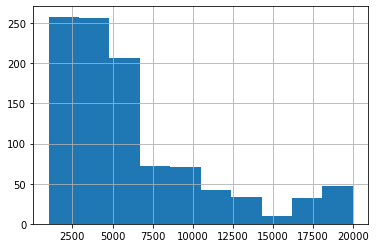

In [7]:
# Let's visualize the distribution of employee Monthly Income
train.MonthlyIncome.hist()

In [8]:
# What is the distribution of employees who leave vs. stay?
train.Attrition.value_counts()

0    849
1    180
Name: Attrition, dtype: int64

In [9]:
# It looks like attrition is REALLY high at this company!!
# around 20% of the employees left last year! That's 1 out of every 5 employees! Gone!
# This is probably why HR wants top focus on disvovering how to keep employees from leaving!
attrition_rate = 180 / 849
attrition_rate

0.21201413427561838

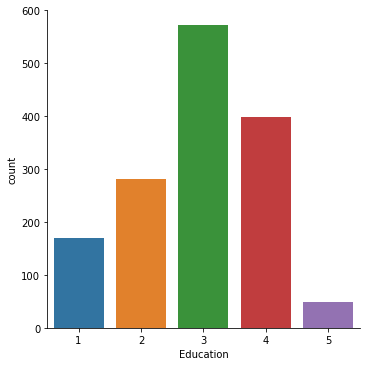

In [10]:
# How many employees have which kind of educational level?
sns.catplot(x="Education",  data=df, kind="count")

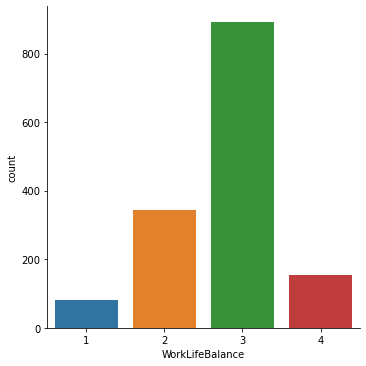

In [11]:
# How many employees self report 
# Remember that self-reporting is a statistical bias
sns.catplot(x="WorkLifeBalance",  data=df, kind="count")

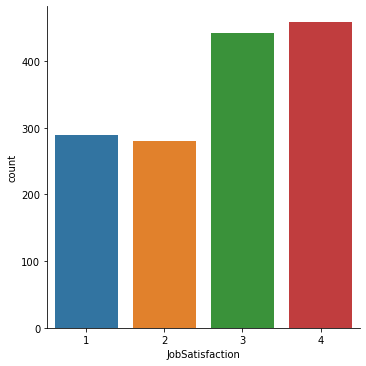

In [12]:
# Let's see how many employees report for the different job satisfaction levels
# Remember that self-reporting is a statistical bias
# Looks like most people are 3s and 4s. 
sns.catplot(x="JobSatisfaction",  data=df, kind="count")

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

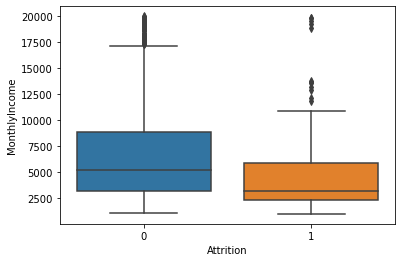

In [13]:
# Do employees who stay get paid more? 
# Let's compare the distributions of Monthly Income between employees who stayed vs. left
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)

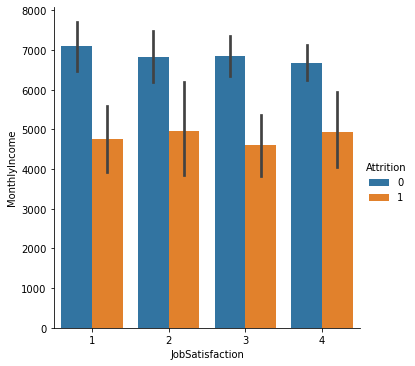

In [14]:
sns.catplot(x="JobSatisfaction", y="MonthlyIncome", data=df, hue="Attrition", kind="bar")

## EDA can go very deep and take more time than we have for this workshop!
- With only 7 variables, like we have here:
    - There are various statistics we should calculate for each variable.
    - There are dozens of possible variable pairings for data visualizations and charts.
    - There are dozens of groupings for statistical hypothesis testing.
- We are skipping a _ton_ of exploration here in order to move forward w/ this workshop.
- Let's make a special memory and note that we are rushing through the EDA process on purpose. 

# Onto the Machine Learning Modeling

## How does a decision tree work:
- Decision Trees work like playing [20 questions](https://en.wikipedia.org/wiki/Twenty_questions) with our features and our target variable.    
- Classification algorithms use training data to measure the distance between points or the distance around boundaries between points.
- By "learning" the pattern recognition around sets of points, the classifier produces a "decision rule" to use to apply to classify new incoming data.

#### Consider this diagram of a decision tree used to predict iris species w/ petal measurements 
![decision tree diagram](decision_tree_diagram.png)

In [15]:
# Let's define our target variable
# This is what we're trying to predict
y_train = train[["Attrition"]]
y_train.head()

,Attrition
index,
553,0
758,0
491,0
376,0
250,1


In [16]:
X_train = train.drop(['Attrition'],axis=1)
X_train.head()

,MonthlyIncome,Education,WorkLifeBalance,JobSatisfaction,PercentSalaryHike,FrequentTravel
index,,,,,,
553,2342,1,2,4,20,0
758,11904,2,1,4,14,0
491,5679,5,3,3,13,1
376,4936,2,2,4,11,0
250,10048,3,3,3,11,1


In [17]:
# The easiest part of the entire Data Science pipeline is fitting the machine learning model...
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# Produce a set of Attrition predictions
# Calculate the predicted probability that the prediction is correct
y_pred = decision_tree_model.predict(X_train)
y_pred_proba = decision_tree_model.predict_proba(X_train)
y_pred_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### Evaluating the Model
- "Accuracy" is calculated as the total number of True Positives + True Negatives divided by the total number of observations
- There are [many, many ways](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) to measure how well a model performs. 

In [19]:
# Accuracy = total number of (true positives + number of true negatives) divided by the total numbrer of observations
accuracy = decision_tree_model.score(X_train, y_train)
print(f'Accuracy of Decision Tree classifier on training set: {accuracy:.2f}%')

Accuracy of Decision Tree classifier on training set: 1.00%


In [20]:
# Now let's see how well this trained model performs on out-of-sample data
X_validate = validate.drop(columns=["Attrition"])
y_validate = validate[["Attrition"]]

accuracy = decision_tree_model.score(X_validate, y_validate)
print(f'Accuracy of Decision Tree classifier on training set: {accuracy:.2f}%')

Accuracy of Decision Tree classifier on training set: 0.76%


In [21]:
## Looks like the model is WAY overfit

## We have a model. But what does this mean?

- Remember that last year's attrition rate was ~ 20%. 
- Our model performs well on training but not on out-of-sample data.
- This behavior in a model is called "overfit". 
- So we're in a space where the model's performance could be improved. 
- Covering all the ways to evaluate and improve models is something we will do in the Codeup class, not 90 minute intro.

# Parting Takeaways

Valuable machine learning models that work perfectly the first time are something that only happen in the movies and in tutorials.

There is much more to Data Science and Machine Learning than making models!

There's _always_ room for more exploraty data analysis. Especially if we get updated, richer information!
    
We could always use better, higher quality data!

Models aren't enough. We need _good, effective models_.
### Ways to improve model performance that we teach in Codeup
- Hypothesis testing for feature selection in our models
- Feature engineering
- Handling imbalanced data problems 
- Identifying and removing outliers
- Different types of ML models
- Hyperparameters and hyperparameter tuning 
- Dimensionality reduction
- Addressing underfit and overfit models

## If you enjoyed what we covered in 90 minutes today, [apply to Codeup](https://codeup.com/) to see what you can do in less than 6 months!
